# Dow Jones Industrial Average (^DJI)

Source
- [Yahoo finance ^DJIA](https://finance.yahoo.com/quote/%5EDJI/history?period1=475804800&period2=1601251200&interval=1d&filter=history&frequency=1d)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dow-Jones-Industrial-Average-(^DJI)" data-toc-modified-id="Dow-Jones-Industrial-Average-(^DJI)-1">Dow Jones Industrial Average (^DJI)</a></span></li><li><span><a href="#Set-Up" data-toc-modified-id="Set-Up-2">Set Up</a></span></li><li><span><a href="#Read-Data" data-toc-modified-id="Read-Data-3">Read Data</a></span><ul class="toc-item"><li><span><a href="#Sample-the-data" data-toc-modified-id="Sample-the-data-3.1">Sample the data</a></span></li></ul></li><li><span><a href="#Rata-Die" data-toc-modified-id="Rata-Die-4">Rata Die</a></span></li><li><span><a href="#Draw-Plots" data-toc-modified-id="Draw-Plots-5">Draw Plots</a></span></li><li><span><a href="#Extract-only-the-desired-data" data-toc-modified-id="Extract-only-the-desired-data-6">Extract only the desired data</a></span></li><li><span><a href="#Quantize-(normalize)-the-data" data-toc-modified-id="Quantize-(normalize)-the-data-7">Quantize (normalize) the data</a></span></li><li><span><a href="#Fill-in-Empty-Dates" data-toc-modified-id="Fill-in-Empty-Dates-8">Fill in Empty Dates</a></span></li><li><span><a href="#Averages" data-toc-modified-id="Averages-9">Averages</a></span><ul class="toc-item"><li><span><a href="#Insert-averages-to-DataFrame" data-toc-modified-id="Insert-averages-to-DataFrame-9.1">Insert averages to DataFrame</a></span></li></ul></li><li><span><a href="#Position-on-given-Date" data-toc-modified-id="Position-on-given-Date-10">Position on given Date</a></span></li><li><span><a href="#Save-DataFrame-to-CSV-file" data-toc-modified-id="Save-DataFrame-to-CSV-file-11">Save DataFrame to CSV file</a></span></li></ul></div>

# Set Up

In [1]:
dataset_file_name = "^DJI.csv"


include("MarketIndicators.jl") 
println()

# Read Data

In [2]:
#data = available_datasets() # uncomment to see all available datasets

df = fetch_dataset(dataset_file_name, "yyyy-mm-dd", "./Data/original/" )
record_count = size(df)[1]
println("data dimentions: ", size(df) )

using Statistics
describe(df)

./Data/original/^DJI.csv
data dimentions: (9016, 7)


,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,Date,,1985-01-29,,2020-11-03,9016,,Date
2,Open,10216.9,1243.71,10111.1,29440.5,,,Float64
3,High,10279.9,1251.21,10184.6,29568.6,,,Float64
4,Low,10151.6,1235.53,10035.6,29406.8,,,Float64
5,Close,10219.4,1242.05,10110.0,29551.4,,,Float64
6,Adj Close,10219.4,1242.05,10110.0,29551.4,,,Float64
7,Volume,1.46069e8,2530000,1.11895e8,2190810000,,,Int64


## Sample the data

In [3]:
columns = preview_data(df) # uncomment to see the data
println()

13×7 DataFrame
│ Row │ Date       │ Open    │ High    │ Low     │ Close   │ Adj Close │
│     │ Date       │ Float64 │ Float64 │ Float64 │ Float64 │ Float64   │
├─────┼────────────┼─────────┼─────────┼─────────┼─────────┼───────────┤
│ 1   │ 1985-01-29 │ 1277.72 │ 1295.49 │ 1266.89 │ 1292.62 │ 1292.62   │
│ 2   │ 1988-01-20 │ 1922.25 │ 1934.85 │ 1858.59 │ 1879.14 │ 1879.14   │
│ 3   │ 1991-01-09 │ 2531.19 │ 2562.38 │ 2456.19 │ 2470.3  │ 2470.3    │
│ 4   │ 1993-12-28 │ 3792.9  │ 3796.56 │ 3779.8  │ 3793.77 │ 3793.77   │
│ 5   │ 1996-12-16 │ 6305.3  │ 6355.61 │ 6253.35 │ 6268.35 │ 6268.35   │
│ 6   │ 1999-12-08 │ 11107.3 │ 11171.8 │ 11068.1 │ 11068.1 │ 11068.1   │
│ 7   │ 2002-12-05 │ 8740.66 │ 8769.05 │ 8608.75 │ 8623.28 │ 8623.28   │
│ 8   │ 2005-11-29 │ 10888.5 │ 10959.8 │ 10888.1 │ 10888.2 │ 10888.2   │
│ 9   │ 2008-11-21 │ 7552.37 │ 8071.75 │ 7449.38 │ 8046.42 │ 8046.42   │
│ 10  │ 2011-11-15 │ 12077.9 │ 12165.1 │ 12001.3 │ 12096.2 │ 12096.2   │
│ 11  │ 2014-11-11 │ 17615.6 │ 17638

# Rata Die

In [4]:
insert!(df, 1, zeros(Int64, record_count), :Rata_Die)
update_rata_die!(df, 1, 2)
#first(df, 6)

columns = preview_data(df)
println()

13×8 DataFrame
│ Row │ Rata_Die │ Date       │ Open    │ High    │ Low     │ Close   │
│     │ Int64    │ Date       │ Float64 │ Float64 │ Float64 │ Float64 │
├─────┼──────────┼────────────┼─────────┼─────────┼─────────┼─────────┤
│ 1   │ 724670   │ 1985-01-29 │ 1277.72 │ 1295.49 │ 1266.89 │ 1292.62 │
│ 2   │ 725756   │ 1988-01-20 │ 1922.25 │ 1934.85 │ 1858.59 │ 1879.14 │
│ 3   │ 726841   │ 1991-01-09 │ 2531.19 │ 2562.38 │ 2456.19 │ 2470.3  │
│ 4   │ 727925   │ 1993-12-28 │ 3792.9  │ 3796.56 │ 3779.8  │ 3793.77 │
│ 5   │ 729009   │ 1996-12-16 │ 6305.3  │ 6355.61 │ 6253.35 │ 6268.35 │
│ 6   │ 730096   │ 1999-12-08 │ 11107.3 │ 11171.8 │ 11068.1 │ 11068.1 │
│ 7   │ 731189   │ 2002-12-05 │ 8740.66 │ 8769.05 │ 8608.75 │ 8623.28 │
│ 8   │ 732279   │ 2005-11-29 │ 10888.5 │ 10959.8 │ 10888.1 │ 10888.2 │
│ 9   │ 733367   │ 2008-11-21 │ 7552.37 │ 8071.75 │ 7449.38 │ 8046.42 │
│ 10  │ 734456   │ 2011-11-15 │ 12077.9 │ 12165.1 │ 12001.3 │ 12096.2 │
│ 11  │ 735548   │ 2014-11-11 │ 17615.6 │ 17638.2

┌ Warning: `insert!(df::DataFrame, col_ind::Int, item, name::Symbol; makeunique::Bool = false)` is deprecated, use `insertcols!(df, col_ind, name => item; makeunique = makeunique)` instead.
│   caller = top-level scope at In[4]:1
└ @ Core In[4]:1


# Draw Plots

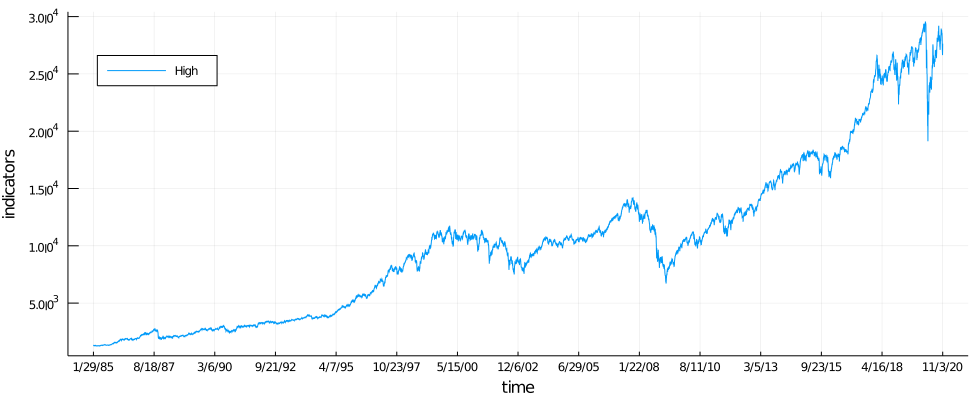

GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to un

In [5]:
using Plots

record_count = size(df)[1]
rows = 1:record_count
dates = format_dates( df[rows,2] , "m/d/yy")

gr()
plot(          dates, # x-axis: dates
               [  df[rows,4]    ], # y-axis
    label    = [  columns[4]   "" ]  ,
    legend   =:topleft, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (980, 400), # width, height
    layout = (1, 1) # number of graphs: vertically, horizontally
    )

# Extract only the desired data

In [6]:
using DataFrames
df = DataFrame( Day = df[:,1], 
                Date = df[:,2],
                High = df[:,4]
               )

columns = preview_data(df)
println()

13×3 DataFrame
│ Row │ Day    │ Date       │ High    │
│     │ Int64  │ Date       │ Float64 │
├─────┼────────┼────────────┼─────────┤
│ 1   │ 724670 │ 1985-01-29 │ 1295.49 │
│ 2   │ 725756 │ 1988-01-20 │ 1934.85 │
│ 3   │ 726841 │ 1991-01-09 │ 2562.38 │
│ 4   │ 727925 │ 1993-12-28 │ 3796.56 │
│ 5   │ 729009 │ 1996-12-16 │ 6355.61 │
│ 6   │ 730096 │ 1999-12-08 │ 11171.8 │
│ 7   │ 731189 │ 2002-12-05 │ 8769.05 │
│ 8   │ 732279 │ 2005-11-29 │ 10959.8 │
│ 9   │ 733367 │ 2008-11-21 │ 8071.75 │
│ 10  │ 734456 │ 2011-11-15 │ 12165.1 │
│ 11  │ 735548 │ 2014-11-11 │ 17638.2 │
│ 12  │ 736636 │ 2017-11-03 │ 23557.1 │
│ 13  │ 737727 │ 2020-10-29 │ 26891.9 │
 Dataset dimentions: (9016, 3)

 Column numbering:
1 Day
2 Date
3 High



# Quantize (normalize) the data

In [7]:
data_original = df[:,3] # keep original for display comparison later

quantize_column!(df, 3)

columns = preview_data(df)
println()

bias for 0 value: -0.044185261106501034
Normalization was performend using formula y=(((x-min)/(max-min))*255)-128 
minimum = 1251.209961
maximum = 29568.570313
Save these values for later to run model preditions
13×3 DataFrame
│ Row │ Day    │ Date       │ High    │
│     │ Int64  │ Date       │ Float64 │
├─────┼────────┼────────────┼─────────┤
│ 1   │ 724670 │ 1985-01-29 │ -128.0  │
│ 2   │ 725756 │ 1988-01-20 │ -122.0  │
│ 3   │ 726841 │ 1991-01-09 │ -116.0  │
│ 4   │ 727925 │ 1993-12-28 │ -105.0  │
│ 5   │ 729009 │ 1996-12-16 │ -82.0   │
│ 6   │ 730096 │ 1999-12-08 │ -39.0   │
│ 7   │ 731189 │ 2002-12-05 │ -60.0   │
│ 8   │ 732279 │ 2005-11-29 │ -41.0   │
│ 9   │ 733367 │ 2008-11-21 │ -67.0   │
│ 10  │ 734456 │ 2011-11-15 │ -30.0   │
│ 11  │ 735548 │ 2014-11-11 │ 20.0    │
│ 12  │ 736636 │ 2017-11-03 │ 73.0    │
│ 13  │ 737727 │ 2020-10-29 │ 103.0   │
 Dataset dimentions: (9016, 3)

 Column numbering:
1 Day
2 Date
3 High



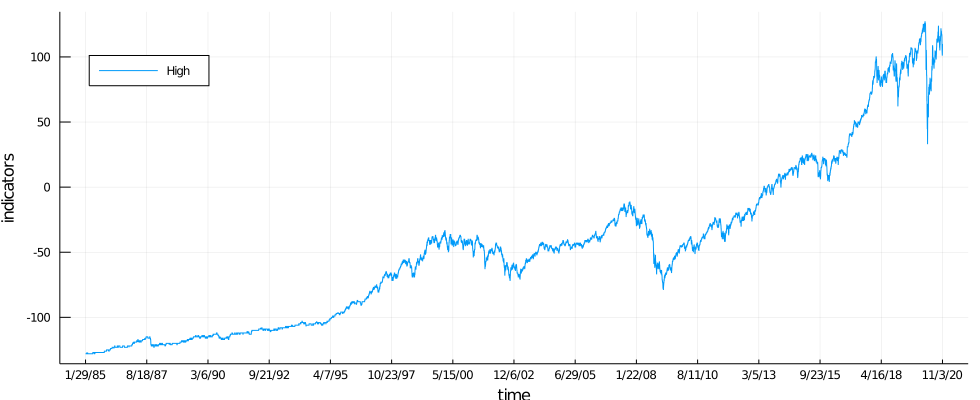

In [8]:
using Plots

count = size(df)[1]
rows = 1:count
dates = format_dates( df[rows,2] , "m/d/yy")

gr()
plot(          dates, # x-axis: dates
               [  df[rows,3]    ], # y-axis
    label    = [  columns[3] ""   ]  ,
    legend   =:topleft, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (980, 400), # width, height
    layout = (1, 1) # number of graphs: vertically, horizontally
    )

# Fill in Empty Dates

In [9]:
for i in 1:count-1
    day_this = df[i,1]   # row, Day column
    day_next = df[i+1,1] # next row, Day column
    
    value = df[i,3] # row, High column, assuming that the last known value is still valid
    
    # loop thru all days you need to insert
    # if there is no gap, nothing will happen
    for day in day_this+1:day_next-1
        # date_string = Dates.format(rata2datetime(day), "yyyy-mm-dd")
        date = rata2datetime(day)
        push!(df, [ day date value ])
    end
    
end


In [10]:

df = sort(df, [:Day]);
count = size(df)[1]
columns = preview_data(df)
println()

12×3 DataFrame
│ Row │ Day    │ Date       │ High    │
│     │ Int64  │ Date       │ Float64 │
├─────┼────────┼────────────┼─────────┤
│ 1   │ 724670 │ 1985-01-29 │ -128.0  │
│ 2   │ 725759 │ 1988-01-23 │ -122.0  │
│ 3   │ 726848 │ 1991-01-16 │ -117.0  │
│ 4   │ 727937 │ 1994-01-09 │ -105.0  │
│ 5   │ 729026 │ 1997-01-02 │ -81.0   │
│ 6   │ 730115 │ 1999-12-27 │ -36.0   │
│ 7   │ 731204 │ 2002-12-20 │ -63.0   │
│ 8   │ 732293 │ 2005-12-13 │ -41.0   │
│ 9   │ 733382 │ 2008-12-06 │ -61.0   │
│ 10  │ 734471 │ 2011-11-30 │ -31.0   │
│ 11  │ 735560 │ 2014-11-23 │ 22.0    │
│ 12  │ 736649 │ 2017-11-16 │ 72.0    │
 Dataset dimentions: (13063, 3)

 Column numbering:
1 Day
2 Date
3 High



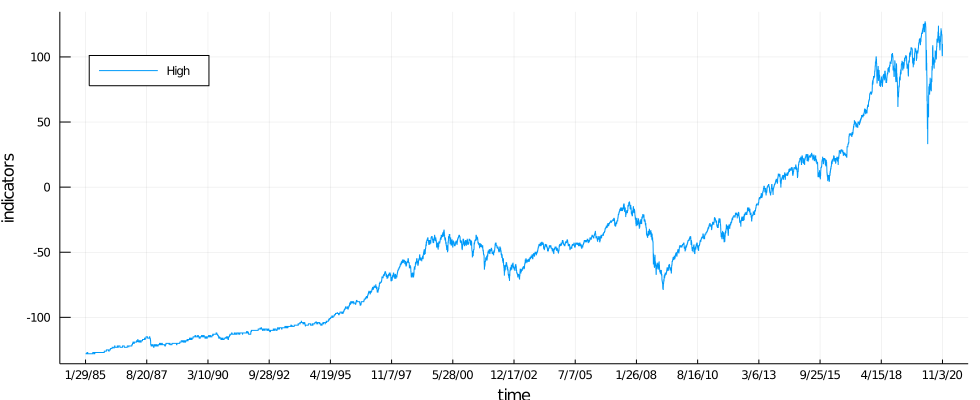

In [11]:
using Plots
count = size(df)[1]
rows = 1:count
dates = format_dates( df[rows,2] , "m/d/yy")

gr()
plot(          dates, # x-axis: dates
               [  df[rows,3]    ], # y-axis
    label    = [ columns[3]    ""  ],
    legend   =:topleft, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (980, 400), # width, height
    layout = (1, 1) # number of graphs: vertically, horizontally
    )

# Averages

In [12]:
averages005 = calculate_average(df, 5, 3)
averages030 = calculate_average(df, 30, 3)
averages090 = calculate_average(df, 90, 3)
averages180 = calculate_average(df, 180, 3)
averages365 = calculate_average(df, 365, 3)
println()

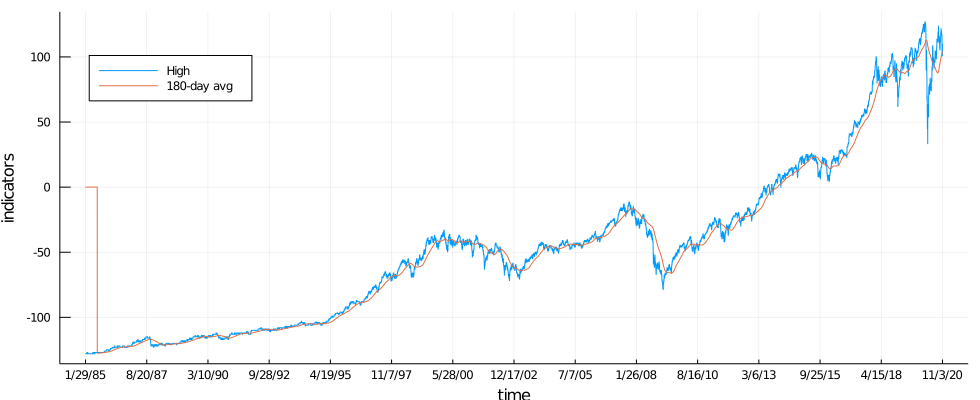

In [13]:
using Plots
count = size(df)[1]
rows = 1:count
dates = format_dates( df[rows,2] , "m/d/yy")

gr()
plot!(          dates, # x-axis: dates
               [  averages180    ], # y-axis
    label    = [ "180-day avg"    ""  ],
    legend   =:topleft, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (980, 400), # width, height
    layout = (1, 1) # number of graphs: vertically, horizontally
    )

## Insert averages to DataFrame

In [14]:
insertcols!(df, 4,  :Avg005 => averages005, makeunique=true)
insertcols!(df, 5,  :Avg030 => averages030, makeunique=true)
insertcols!(df, 6,  :Avg090 => averages090, makeunique=true)
insertcols!(df, 7,  :Avg180 => averages180, makeunique=true)
insertcols!(df, 8,  :Avg365 => averages365, makeunique=true)
describe(df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,Day,731201.0,724670,731201.0,737732,,,Int64
2,Date,,1985-01-29,,2020-11-03,13063,,Date
3,High,-46.6158,-128.0,-47.0,127.0,,,Float64
4,Avg005,-46.6123,-128.0,-47.4,126.4,,,Float64
5,Avg030,-46.5976,-128.0,-47.13,123.63,,,Float64
6,Avg090,-46.566,-127.97,-46.66,119.87,,,Float64
7,Avg180,-46.491,-127.64,-46.78,112.75,,,Float64
8,Avg365,-46.2601,-126.98,-46.84,105.19,,,Float64


# Position on given Date

In [15]:
position_column = position_on_date(df, "2020-09-30")
position_column[1:3]

3-element Array{Float64,1}:
 113.0
 113.0
 113.0

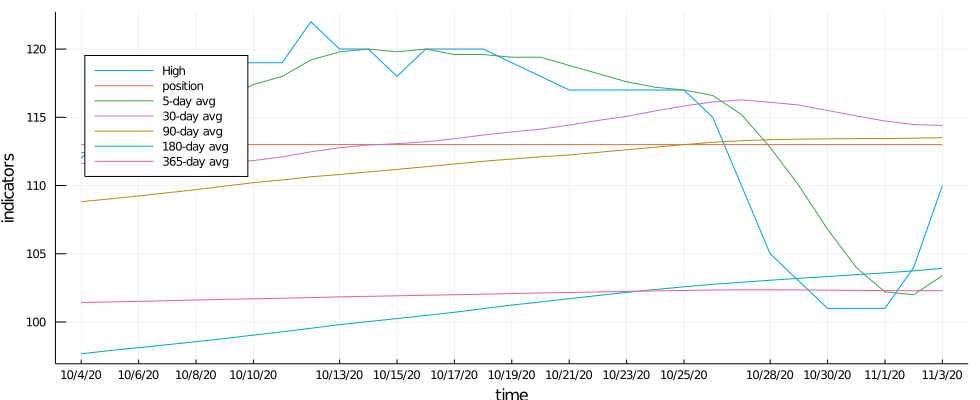

In [16]:
using Plots
count = size(df)[1]
rows = count-30:count
dates = format_dates( df[rows,2] , "m/d/yy")

gr()
plot(      dates, # x-axis: dates
        [  df[rows,3] position_column[rows] averages005[rows] averages030[rows] averages090[rows] averages180[rows] averages365[rows] ], # y-axis
    label    = 
        [ columns[3] "position" "5-day avg" "30-day avg" "90-day avg" "180-day avg" "365-day avg" ""  ],
    legend   =:topleft, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (980, 400), # width, height
    layout = (1, 1) # number of graphs: vertically, horizontally
    )

[back to top](#Table-of-Contents)
<hr/>

# Save DataFrame to CSV file

In [17]:
save_dataset(df, dataset_file_name );